In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from utils import label_data, get_data

In [20]:
df

,C_Active(g),L_Active(g),itp_F0(Hz),itp_Po(dB),itp_Temp(c),itp_HR(bpm),itp_RR(bpm),itp_HRV,pain_score,acc_score,hr_score,rr_score,vital_score,score_sum
time(s),,,,,,,,,,,,,,
47.031667,0.008580,0.006939,0.000000,-27.190211,0.045274,20.14836,12.162386,0.018108,0.0,0.0,0.0,0.0,0.0,0.0
47.131667,0.008609,0.007109,0.000000,-27.167399,0.045740,20.18797,12.162386,0.018107,0.0,0.0,0.0,0.0,0.0,0.0
47.231667,0.008638,0.007280,0.000000,-27.144587,0.046207,20.29366,12.162386,0.018107,0.0,0.0,0.0,0.0,0.0,0.0
47.331667,0.008667,0.007450,0.000000,-27.121221,0.046673,20.39936,12.162386,0.018107,0.0,0.0,0.0,0.0,0.0,0.0
47.431667,0.008696,0.007553,0.000000,-27.096930,0.047139,20.50505,12.162386,0.018107,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015.631700,0.013925,0.087991,0.000000,-24.428276,0.017207,25.95515,11.363090,0.056490,0.0,0.0,2.0,2.0,2.0,2.0
1015.731700,0.014104,0.088098,0.000000,-24.407823,0.017099,26.21055,11.374968,0.056490,0.0,0.0,2.0,2.0,2.0,2.0
1015.831700,0.014283,0.087813,0.000000,-24.410023,0.016954,26.46595,11.386846,0.056420,0.0,0.0,2.0,2.0,2.0,2.0


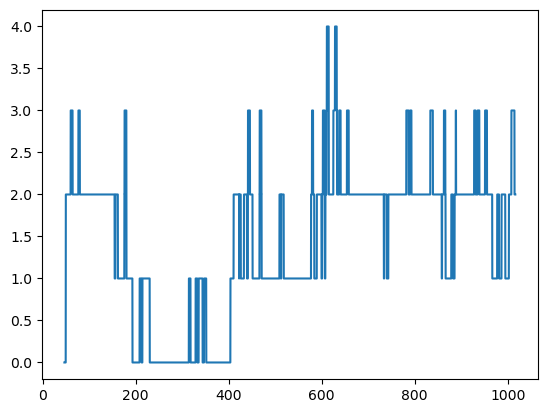

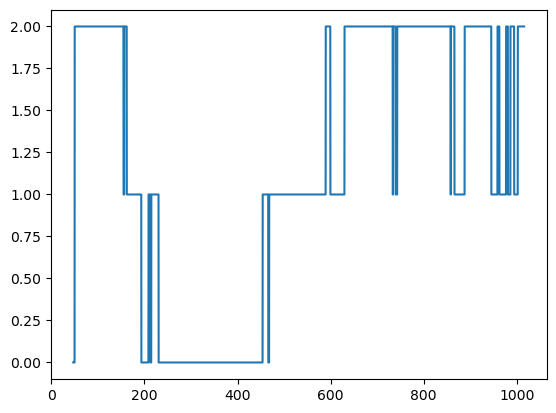

125.0


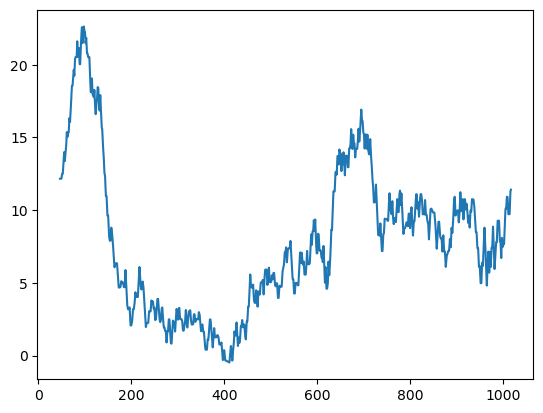

In [74]:
plt.plot(data['data_df']['itp_RR(bpm)'])
print(data['base_hr'])

In [ ]:
def plot_score(s):
    data_path = f'/Users/shiyuanduan/Documents/PainStudy/Pain_Data_w_Freq/{s}_Summary.csv'
    df = pd.read_csv(data_path)

    df = label_pain(df)
    df_resample = df.rolling(10, step=10).max()
    fig, axs = plt.subplots(2, figsize=(20, 6))
    axs[0].scatter(df_resample.index, df_resample['itp_F0(Hz)'], marker='x', s=15)
    axs[0].set_title('Vocal Freq [Hz]')
    axs[1].plot(df_resample['pain_score'])
    axs[1].set_title('Pain Score')
    axs[-1].set_xlabel('Time [ms]', fontsize=16)
    fig.suptitle(f'Subject {s}', fontsize=16)

    output_folder = '/Users/shiyuanduan/Documents/PainStudy/Pain Score Result'
    fig.savefig(f'{output_folder}/Subject_{s}_Plot.png')
    plt.show()

In [2]:
for i in range(1, 37):
    if i == 11: continue # subject 11 does not exist
    result = get_data(i)
    start, end = result['lab_draw_start'], result['lab_draw_end']
    data_df = label_data(i)
    max_score = data_df[start:end]['score_sum'].max()
    print(f'subject:{i} max pain: {max_score}')

subject:1 max pain: 2.0
subject:2 max pain: 2.0
subject:3 max pain: 2.0
subject:4 max pain: 5.0
subject:5 max pain: 2.0
subject:6 max pain: 0.0
subject:7 max pain: 4.0
subject:8 max pain: 2.0
subject:9 max pain: 4.0
subject:10 max pain: 0.0
subject:12 max pain: 4.0
subject:13 max pain: 4.0
subject:14 max pain: 1.0
subject:15 max pain: 5.0
subject:16 max pain: 2.0
subject:17 max pain: 2.0
subject:18 max pain: 3.0
subject:19 max pain: 4.0
subject:20 max pain: 1.0
subject:21 max pain: 2.0
subject:22 max pain: 0.0
subject:23 max pain: 4.0
subject:24 max pain: 3.0
subject:25 max pain: 2.0
subject:26 max pain: 6.0
subject:27 max pain: 2.0
subject:28 max pain: 1.0
subject:29 max pain: 1.0
subject:30 max pain: 2.0
subject:31 max pain: 2.0
subject:32 max pain: 4.0
subject:33 max pain: 2.0
subject:34 max pain: 2.0
subject:35 max pain: 6.0
subject:36 max pain: 4.0
